#ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold

#Tree and Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Performance Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

#Tuning and Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

#Column display and numericals simplication for readability purposes
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format",lambda x:"%.3f" % x)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
data=pd.read_csv("/content/drive/MyDrive/MIT/7. Elective Project/ExtraaLearn.doc.csv")
dt=data.copy()

#Data Overview & Cleaning


###*Getting a first sense of the dataset structure and content*

In [ ]:
print("Data shape: ",dt.shape)
dt.info()

Data shape:  (4612, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-

In [ ]:
dt.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


Observations:

- 14 categories, most of them are object types (strings are expected), numerical categories are either integers or float.
- We can already expect that ID will have to be dropped shall it be unique for every row.
- Unit of meansure for the time spent is not specified (minutes, hours?)
- Measure of Page views is unclear as a float: ie for row 2, how do we reach the result of 0.074 page? we assume the calculation could be based on time, but it would be interesting to understand the calculation.

###*Null values & Duplicates*

In [ ]:
dt.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [ ]:
dt.duplicated().sum()

0

Let's check for the unique values to identify if some categories are not relevant for the analysis.

--> There seem to be no null values, nor duplicates to be treated.

###*Unique values cleaning*

In [ ]:
dt.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Observation:
Most categories seem to provide binary results.

The ID category has as many results as the number of rows and does not have a value add: it can be dropped.

In [ ]:
dt.drop(["ID"], axis=1, inplace=True)

In [ ]:
dt.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


# Exploratory Data Analysis (EDA)

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**--> To ensure a holistic approach to the EDA, and avoid any bias due to the guiding questions, I will start by getting a first sense of the data through the representation of all the categories (Univariate Analysis). On that basis I will look for correlations (Bivariate Anaylsis). Only then, will I look at the guiding questions.**

## *Univariate Analysis*

In [ ]:
num_cols=["age","website_visits","time_spent_on_website","page_views_per_visit","status"]
cat_cols=["current_occupation", "first_interaction", "profile_completed", "last_activity","print_media_type1","print_media_type2","digital_media","educational_channels","referral"]


#### **Numerical Variables**

In [ ]:
#Summary Statistics
dt[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


Numerical data observations:
- **Age**: Overall older age range is noted in the data. The data range is quite broad (from 18 to 63 years old), but with a noticable right skew (median and mean at 51 and 46 years old, vs 57 years oldat 75% and 63% as amx value). As the Q1 (25%) lays at 36 years old, the min. value is understood as an outlier.
- **Website visits**: Distribution of the data seems quite condensed, with notably outliers to the right: Q1: 2, Q3:5, with Q2 at 3 and mean at 3.567. This seems to represent a rather normal distribution, however outliers are noted with the max value reaching 30. Consdering the low values, there might be a need for outlier treatment not to impact the feature analysis.
- **Time spent**: The data is more broadly distributed, with an important right skew: while Q1 and Q2 reach 148.75 and 376 respectively, Q3 reaching 1,336.75 and the max value jumps to 2,537. The max value is an important outlier that might have to be analysed further. The mean value refelcts the right skewedness and reaching 724.
- **Page views**: Data seems more normally distributed, but with a notable right skewedness(Q1: 2.078, Q2: 2.792, Q3: 3.756 but max value: 18.434). The mean value remains quite close to the median (3.026) which seems to indicate that the data might not include many upper outliers (or that these are compensated by many more lower outliers - to be evaluated further)
- **Status**: is a binary variable that seem to reflect that the vast majority oft he data seem to be 0s (Q1-2-3:0), with a large std reaching 0.458 (almost half way btw min and max values). This reflects that the 1 values are outliers. This would need further analysis in later stages.

#####*Data Visualisation*

In [ ]:
# Numerical data - Visualisation
def hist_box(col):
  f, (ax_box, ax_hist)=plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.15, 0.85)}, figsize=(7,5))
  sns.set(style="darkgrid")

  sns.boxplot(x=dt[col],ax=ax_box, showmeans=True, color="darkseagreen", meanprops={"marker":"s", "markerfacecolor":"black"})
  sns.distplot(dt[col],ax=ax_hist, color="darkblue")
  ax_hist.axvline(dt[col].mean(),color="black", linestyle="-.")
  ax_hist.axvline(dt[col].median(), color="orange", linestyle="-")
  plt.title(col)
  plt.show()

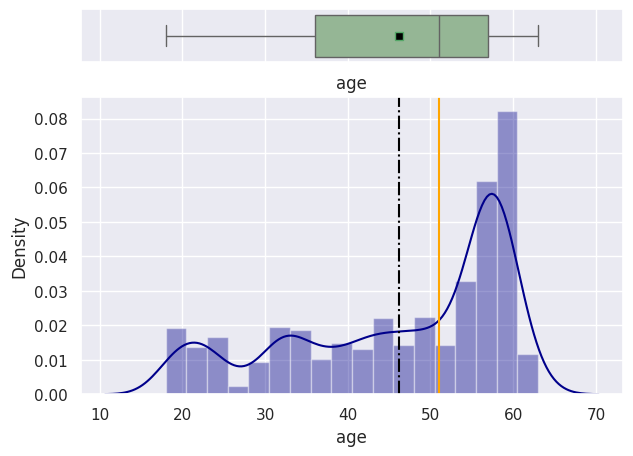

In [ ]:
hist_box("age")

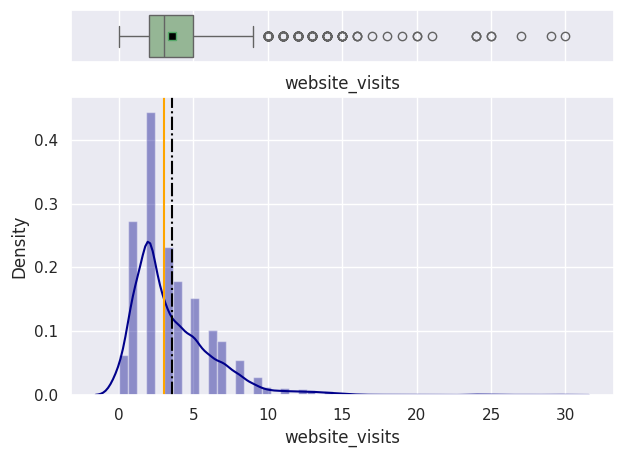

In [ ]:
hist_box("website_visits")

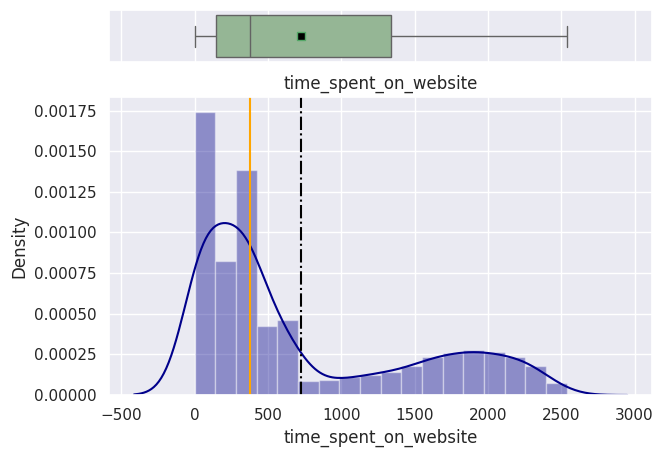

In [ ]:
hist_box("time_spent_on_website")

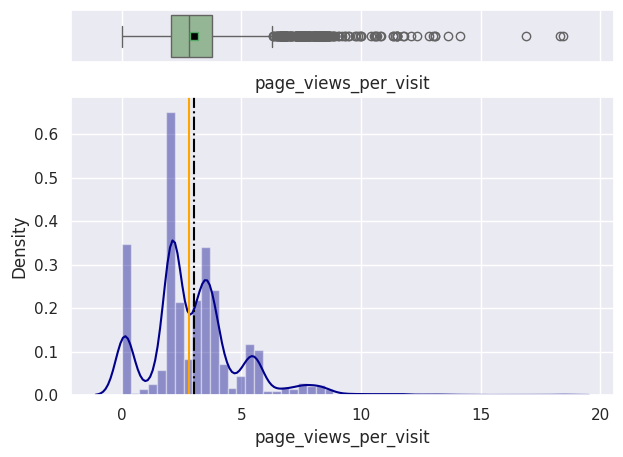

In [ ]:
hist_box("page_views_per_visit")

**Observations**: the curves are aligned with our observations from the summary stats:
- **age** is strongly right skewed with a concentration of an older user base,
- **website visits** are left skewed with a higher representation of limited / unique visits to the website. however we note a number of outliers towards the higher end of the spectrum,
- **time spent on website**: more of a left skewed variable, with a strong reprensentation of low time spent on the website, however passt 1000, we note a close-to-normal curve. This seems to identify a different sub-group in the user base,
- **time spent**: lots of variation in the data, with strong peaks and lows. However, we note a strong and continuous presence of outliers passed Q3, this also seems to indicate a sub-group in the user base.


###**Categorical Variables**

In [ ]:
# Categorical variables
for i in cat_cols:
  print((dt[i].value_counts(normalize=True)*100).to_string(name=False))
  print("- "*40)

current_occupation
Professional   56.722
Unemployed     31.245
Student        12.034
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
first_interaction
Website      55.117
Mobile App   44.883
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
profile_completed
High     49.089
Medium   48.591
Low       2.320
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
last_activity
Email Activity     49.393
Phone Activity     26.756
Website Activity   23.851
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print_media_type1
No    89.224
Yes   10.776
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print_media_type2
No    94.948
Yes    5.052
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
digital_media
No    88.573
Yes   11.427
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
educ

#####*Data Visualisation*

In [ ]:
#Setting the titles
def title_graph(col):
  format_name=col.replace("_", " ").title()
  return f'{format_name} Distribution'

#Function
def cat_graph(col, color):
    title=title_graph(col)
    labels = dt[col].value_counts().reset_index()
    labels.columns = [col, "Count"]
    fig=px.bar(labels,x=col,y="Count", template="plotly_white", title=title, text="Count")
    fig.update_traces(marker_color=color, opacity=1, textposition="outside")
    fig.update_layout(autosize=False,width=400, height=500)
    fig.show()

In [ ]:
cat_graph("current_occupation", "darkseagreen")

In [ ]:
cat_graph("first_interaction","darkseagreen")

In [ ]:
cat_graph("profile_completed","darkseagreen")

In [ ]:
cat_graph("last_activity","darkseagreen")

In [ ]:
cat_graph("print_media_type1","darkseagreen")

In [ ]:
cat_graph("print_media_type2","darkseagreen")

In [ ]:
cat_graph("digital_media","darkseagreen")

In [ ]:
cat_graph("educational_channels","darkseagreen")

In [ ]:
cat_graph("referral", "darkseagreen")

**Categorical data observations**:

- **Current Occupation**: majority of professionals, followed by almost 1/3 of unemployed users, and a minority of Students. This distribution is coherent with the age range represented.
First interaction: very close distribution between website and app (55-44% aprox.)
- **Profile completed**: quite important profile completion, with a "low" level of completion only representing 2.3% of all profiles. This might demonstrate an early rate of engagement, that is not sustained throughout
- **Last activity**: majority of engagement is occuring through emails (49.39%), followed by phone activity (26.76%), and website. It is interesting to note the absence of Mobile App interaction, especially considering that this represented 44.88% of the first interactions.
- **Print Media 1&2**: low rates of engagement: "No" for 89% and 95% respectively.
- **Digital Media**: facing similar lack of success in terms of engagement with 89% of datapoints reporting "no"
Educational channels: low rates of engagemetn with overwhelming "No" (85%)
- **Referral**: very limited use of the referral options, with only 2% of users being referred.
--> It would specifically be interesting to dig deeper in a number of these metrics, including the educational channels and referrals and understand the profiles and behaviours of the users using these channels. The reach of the media products (prints + digital) hs to be analysed deeper to encourage reach and engagement.

## *Bivariate Analysis*

#### **Numerical Data Correlation Analysis**

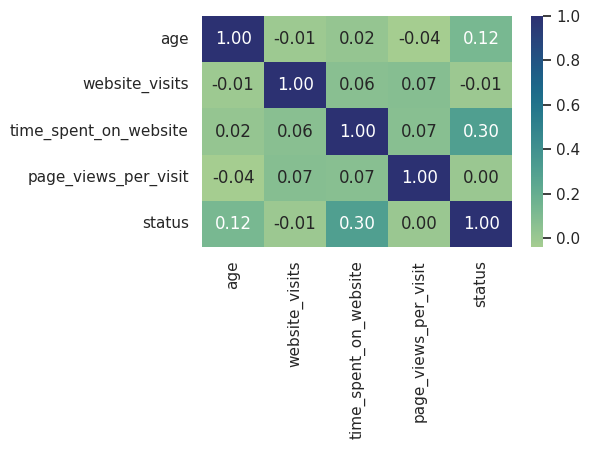

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(data[num_cols].corr(), annot=True,fmt=".2f",cmap="crest")
plt.show()

Observations: we cannot identify at this stage very strong positive or negative correlations.

**Correlations with Status**:
- time spent on website - status: 0.3 = strongest relationship and must be analysed
-positive relationship between age and status at 0.12

*Weaker positive correlations:*

- page views per visit - website visits
- page views per visit - time spent on website

**Negative correlation:** the correlations are so weak that they might not be representative of any non-negligeable phenomenon. Nonetheless, we note the following negative relationships:

-age - page views per visit (the younger, the more pages visited)
-at -0.01, link between age and website visits can be considered as null.

It is interesting to note that the age does not seem to have a non-negligeable impact on the nb of website visits, time spent on the website, page views per visit

#### **Categorical Data Analysis**


Considering that we are trying to analyse the factors leading to the conversion of clients to paid customers, we will center the correlation analysis on the status feature to understand its potential primary factors. Based on the results, we will move forward to understand secondary underlying factors.

*Bining Numerical Variables for EDA*

In [ ]:
#Bining time_spend_on_website
bins = [0, 500, 1000, 1500, 2000, 2500, np.inf]
names = ['<500', '500-1000', '1000-1500', '1500-2000','2000-2500', '2500+']

dt['time_spent_on_website'] = pd.cut(dt['time_spent_on_website'], bins, labels=names)

In [ ]:
#Bining page_views_per_visit
bins2 = [0, 2, 4, 6, 8, 10, 12, 14, np.inf]
names2 = ['<2', '2-4', '4-6','6-8', '8-10', '10-12', '12-14', '14+']

dt['page_views_per_visit'] = pd.cut(dt['page_views_per_visit'], bins2, labels=names2)

In [ ]:
#Bining website_visits
bins3 = [0, 5, 10, 15, 20, 25, 30, np.inf]
names3 = ['<5', '5-10', '10-15','15-20', '20-25', '25-30','30+']

dt['website_visits'] = pd.cut(dt['website_visits'], bins3, labels=names3)
print(dt.head())

   age current_occupation first_interaction profile_completed website_visits  \
0   57         Unemployed           Website              High           5-10   
1   56       Professional        Mobile App            Medium             <5   
2   52       Professional           Website            Medium             <5   
3   53         Unemployed           Website              High             <5   
4   23            Student           Website              High             <5   

  time_spent_on_website page_views_per_visit     last_activity  \
0             1500-2000                   <2  Website Activity   
1                  <500                   <2  Website Activity   
2                  <500                   <2  Website Activity   
3                  <500                  2-4  Website Activity   
4              500-1000                  14+    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No         

*Bivariate Analysis Visualisation*

In [ ]:
#Title
def title_graph(col):
  format_name=col.replace("_", " ").title()
  return f'{format_name} Distribution by Status'
#Graph function
def cat_hist(col):
  title=title_graph(col)
  color_map={0:"darkblue", 1:"darkseagreen"}
  fig=px.histogram(dt,x=col, color="status", barmode="stack", nbins=10, opacity=0.6, color_discrete_map=color_map, text_auto=True, title=title)
  fig.update_traces(textposition='outside')
  fig.update_layout(height=600, width=600, bargap=0.05, title=dict(text=title, x=0.5, xanchor="center", font=dict(size=24)))
  fig.show()

In [ ]:
cat_hist("age")

In [ ]:
# Zooming in key features for subscriber profile
from tabulate import tabulate
def key_feat(col,head):
  breakdown=(dt.groupby(col)["status"].value_counts(normalize=True)*100).unstack().fillna(0)
  key_feat_subs= breakdown[1].sort_values(ascending=False).head(head)
  key_feat_df = key_feat_subs.reset_index()
  key_feat_df.columns = [col, 'Count']
  table = tabulate(key_feat_df, headers='keys', tablefmt='fancy_grid', showindex=False)

  print(table)

In [ ]:
key_feat("age",10)

╒═══════╤═════════╕
│   age │   Count │
╞═══════╪═════════╡
│    53 │ 43.956  │
├───────┼─────────┤
│    50 │ 43.5294 │
├───────┼─────────┤
│    34 │ 41.8919 │
├───────┼─────────┤
│    45 │ 39.2857 │
├───────┼─────────┤
│    41 │ 37.1429 │
├───────┼─────────┤
│    59 │ 36.8902 │
├───────┼─────────┤
│    39 │ 36.5385 │
├───────┼─────────┤
│    56 │ 36.3636 │
├───────┼─────────┤
│    36 │ 36.2069 │
├───────┼─────────┤
│    55 │ 36      │
╘═══════╧═════════╛


**Observations on age**:
- first age group 55-59. Across all age groups, approx.75% of non-paying vs paying status
- Rather homogenous distribution of paying vs non-paying users, except for the 55-59 age range: jump
- Amongst younger users: notable jump in user numbers in the 30-34 age range (both in ttl user number and number of paying users)
- interestingly, the proportion of subscribers amongst the ages were evaluated. The top ages are listed above. By proportion, the same trend is identified, with a strong representation of **early senior professionals (50, 53, 55, 56, 59 years old)**, but also add: **early professionals (34 and 36 years old)**, **mid-career professionals (39, 41, 45 years old)**. These last two age groups could represent growing opportunities for the buisness.

In [ ]:
cat_hist("current_occupation")

In [ ]:
key_feat("current_occupation",3)

╒══════════════════════╤═════════╕
│ current_occupation   │   Count │
╞══════════════════════╪═════════╡
│ Professional         │ 35.5122 │
├──────────────────────┼─────────┤
│ Unemployed           │ 26.5788 │
├──────────────────────┼─────────┤
│ Student              │ 11.7117 │
╘══════════════════════╧═════════╛


**Occupation**: most paying users are **professionals**, both in absolute and relative terms second group are unemployed, with a strong minority of students. This is aligned with the age range.

In [ ]:
cat_hist("first_interaction")

In [ ]:
key_feat("first_interaction",2)

╒═════════════════════╤═════════╕
│ first_interaction   │   Count │
╞═════════════════════╪═════════╡
│ Website             │ 45.594  │
├─────────────────────┼─────────┤
│ Mobile App          │ 10.5314 │
╘═════════════════════╧═════════╛


**first interaction**: strong trend in favour of the website interaction amongst the members that are paying users: 45.6% of paying users (versus 10.5% of paying users amongst the users whose first interaction was through the Mobile App)
—> might be either: age or that the website interface is clearer than mobile app

—> website first engagement always leading, even for younger, minority, user-base. This seems to indicate theat the website interface is either more user-friendly, or that the website interface is more visible to the client base (ie link to the website on emails, rather than download link to an app). Another factor might be that visiting a website is considered as easier/more practical/less invasive of a process than downloading an app.


In [ ]:
#Title
def title_graph(col):
  format_name=col.replace("_", " ").title()
  return f'{format_name} Distribution by Age'

#Graph function
def age_hist(col):
  title=title_graph(col)

  colors=["steelblue", "mediumseagreen","darkseagreen","darkblue"]

  fig=px.histogram(dt,x="age", color=col, barmode="stack", nbins=10, opacity=0.6, color_discrete_sequence=colors, text_auto=True, title=title)
  fig.update_traces(textposition='outside')
  fig.update_layout(height=600, width=900, bargap=0.05, title=dict(text=title, x=0.5, xanchor="center", font=dict(size=24)))
  fig.show()


In [ ]:
age_hist("first_interaction")

Non-conclusive

In [ ]:
cat_hist("profile_completed")

**profile completion** — as could be expected: most paying users have “high” level of completion of their profiles (69%), but we also note that they represent an important percentage of the total number of “highly” completed profiles (approx. 41.8% total)


In [ ]:
cat_hist("website_visits")

In [ ]:
key_feat("website_visits",10)

╒══════════════════╤═════════╕
│ website_visits   │   Count │
╞══════════════════╪═════════╡
│ 10-15            │ 33.9806 │
├──────────────────┼─────────┤
│ 20-25            │ 33.3333 │
├──────────────────┼─────────┤
│ <5               │ 30.5846 │
├──────────────────┼─────────┤
│ 5-10             │ 28.7001 │
├──────────────────┼─────────┤
│ 15-20            │ 25      │
├──────────────────┼─────────┤
│ 25-30            │  0      │
├──────────────────┼─────────┤
│ 30+              │  0      │
╘══════════════════╧═════════╛


**website visits**: in absolute numbers we note a very low number of visits on the website: both paying and non-paying users rarely visit the website: 72% of paying users have only visited the website 1-4 times, another 24.3% have visited it between 5-9 times.
- In absolute numbers still, we also note **important outliers** (max value 30): this is shown **in relative numbers** in % of subscriibers,

- However, some interesting points from the relative figures focusing on subscribers (paying users): the first two groups (wkth both over 33% each) are from 10-15 and 20-25 pages per visit. Above that, the % collapses to 0, with only free users consulting the website for more that 25 pages per visit. This indication could support the company in: 1) trying to convert the free users consulting hte website at a frequency of 10-25; 2) converting free users above this range, or have a better understanding of their use of the website as this could reflect different patterns of behaviour.


In [ ]:
cat_hist("time_spent_on_website")

In [ ]:
key_feat("time_spent_on_website",10)

╒═════════════════════════╤═════════╕
│ time_spent_on_website   │   Count │
╞═════════════════════════╪═════════╡
│ 2500+                   │ 60      │
├─────────────────────────┼─────────┤
│ 2000-2500               │ 50.6608 │
├─────────────────────────┼─────────┤
│ 1500-2000               │ 50.4318 │
├─────────────────────────┼─────────┤
│ 500-1000                │ 50.3663 │
├─────────────────────────┼─────────┤
│ 1000-1500               │ 40.8497 │
├─────────────────────────┼─────────┤
│ <500                    │ 16.4835 │
╘═════════════════════════╧═════════╛


**time spent on website** - rather low, but rather homogenous distribution in absolute numbers. In relative numbers, we note a jump in the involvement of paying number in terms of % of the total:
Above (>)500: largest category: 59% of all users (paying and non paying) - and 16%.6% of paying users, however the relative data analysis allows us to note that the more people spend time on the website, the more likely they are to be paying users.
Above 2500 (time unit), 60% of the users are subscribers, however this trend appears earlier with users spending above 500 (time unit) being 50% likely to be subscribers.
Thus, only the first category has a low conversion rate.

The company could for instance act on this by sending insentives to users past the 500 (time unit) spent on the website in order to trigger a higher conversion rate.


In [ ]:
cat_hist("page_views_per_visit") ## I do not knwo what is happening here, tried but failed to fix it. Any feedback is welcomed!

In [ ]:
key_feat("page_views_per_visit",8)

╒════════════════════════╤═════════╕
│ page_views_per_visit   │   Count │
╞════════════════════════╪═════════╡
│ 12-14                  │ 71.4286 │
├────────────────────────┼─────────┤
│ 10-12                  │ 37.5    │
├────────────────────────┼─────────┤
│ <2                     │ 31.2997 │
├────────────────────────┼─────────┤
│ 2-4                    │ 30.7858 │
├────────────────────────┼─────────┤
│ 4-6                    │ 29.4212 │
├────────────────────────┼─────────┤
│ 6-8                    │ 26.1745 │
├────────────────────────┼─────────┤
│ 8-10                   │ 18.4783 │
├────────────────────────┼─────────┤
│ 14+                    │  0      │
╘════════════════════════╧═════════╛


**page views per visit** — in absolute numbers vast majority (84.5%) of the users consult less than 5 pages per visit, with low engagement (less thant a third of paid users)

However, in relative terms we take note of an interesting trend: when users consult **12-14 pages, 71.4% of them are paid subscribers**.

The **category 10-12 gathers 37.5% and therefore offers an interesting margin of progression to ensure that these users engage more with the website, or than they convert earlier to paid users.**


In [ ]:
cat_hist("last_activity")

In [ ]:
key_feat("last_activity",3)

╒══════════════════╤═════════╕
│ last_activity    │   Count │
╞══════════════════╪═════════╡
│ Website Activity │ 38.4545 │
├──────────────────┼─────────┤
│ Email Activity   │ 30.3336 │
├──────────────────┼─────────┤
│ Phone Activity   │ 21.3128 │
╘══════════════════╧═════════╛


In [ ]:
age_hist("last_activity")

**last activity** - In absolute numbers: majority of paying users had their last interaction over emails (50%); 30.7% on website; 19% on the phone
In relative numbers: same trend, but stronger preference for the website (38.45% subscribers).

Age difference? We conducted the analysis (code below unaunched but can be pressed by the corrector) Conlusion: No: similar distribution found across age ranges: preferred means of communication are emails, followed by website and phone, with the phone being used more than website in 20-24 age range, directly contradicting our initial assumption. However, amongst the predominant age range 55-59, we note that the phone is preferred over website activity, which might influence the overall distribution.

In [ ]:
# Observations will be treated in a cross analysis way a tthe end of Print Media 1 - Print Media 2
# and Digital Media
cat_hist("print_media_type1")

In [ ]:
key_feat("print_media_type1",2)

╒═════════════════════╤═════════╕
│ print_media_type1   │   Count │
╞═════════════════════╪═════════╡
│ Yes                 │  31.992 │
├─────────────────────┼─────────┤
│ No                  │  29.599 │
╘═════════════════════╧═════════╛


In [ ]:
cat_hist("print_media_type2")

In [ ]:
key_feat("print_media_type2",2)

╒═════════════════════╤═════════╕
│ print_media_type2   │   Count │
╞═════════════════════╪═════════╡
│ Yes                 │ 32.1888 │
├─────────────────────┼─────────┤
│ No                  │ 29.7328 │
╘═════════════════════╧═════════╛


In [ ]:
cat_hist("digital_media")

In [ ]:
key_feat("digital_media",2)

╒═════════════════╤═════════╕
│ digital_media   │   Count │
╞═════════════════╪═════════╡
│ Yes             │ 31.8786 │
├─────────────────┼─────────┤
│ No              │ 29.5961 │
╘═════════════════╧═════════╛


In [ ]:
age_hist("print_media_type1")

In [ ]:
age_hist("print_media_type2")

In [ ]:
age_hist("digital_media")

**print media 1** - similar distribution of paid users amongst yes and no: 29,6% yes, 32% Nos - but due to the vast majority of NO (89.2%), in absolute numbers, lot more paid users answering “no” (also 88% of all paid users)

**print 2** - similar trend: vast majority of NO (92.8% total, including 28% of paid users) - paid users share of tw categories is comparable (28% NO, 32% YES), but NO representing 87% of paid users

**digital media** - similar trend again - man of NO (88.6% total), paid users have a similar proportion in two categories (29.6% of NOs and 32% of YESs), with NOs representing 87.8% of paid users

—> no clear age factor on the reach, other than the ratio

In [ ]:
cat_hist("educational_channels")

In [ ]:
key_feat("educational_channels",3)

╒════════════════════════╤═════════╕
│ educational_channels   │   Count │
╞════════════════════════╪═════════╡
│ No                     │ 30.2022 │
├────────────────────────┼─────────┤
│ Yes                    │ 27.9433 │
╘════════════════════════╧═════════╛


**educational channels** - in absolute numbers similar trend: 84.7% NO (30% paid customers) - YES: 27.94% paid customers

In relative numbers (focus only on subscribers), educational channels also do not seem to be such a driver for subscription.

In [ ]:
cat_hist("referral")

In [ ]:
key_feat("referral",2)

╒════════════╤═════════╕
│ referral   │   Count │
╞════════════╪═════════╡
│ Yes        │ 67.7419 │
├────────────┼─────────┤
│ No         │ 29.0772 │
╘════════════╧═════════╛


**referral** - although they represent a strong minority in absolute numbers (97.98% iff all users were not referred), we note that the referral seems to encorage paid subscription as amongst the referred users, almost 68% are paid users (vs 29% of un-referred users)

—> this seems to indicate an opportunity for the company to encourage referrals

## *Guiding questionås and EDA conclusions*

*1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.*

--> As noted, professionals are the leading group, followed by Unemployed users. This, along with the age ranges concerned seem to reflect that this service is purchased at early seniority (mid7late 50s), potentially to transition towards a more senior role, but also at mid- and early career, potentially to progress in theor careers or transition towards new ones. More detailed data would be needed to clarify the users' intentions.


*2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?* and
*3. The company uses multiple modes to interact with prospects. Which way of interaction works best?*

--> Leading first interactions are occuring through the website, similarly to the last activity. We note the lack of tracking data on the app, as well as the lack of engagement on this interface. It could be interesting for the company to conuduct a UI-UX review of the app-based interface as, if the first interaction through a website might seem easier (no need to download), the last activity could be through an app. The lack of data / app usage however demonstrate a lack of investment on that front. More data would be needed to conclude, but killing the app interface might propose an array of savings for the company (or, shall it decide to targe thte younger professional client base: strong investment would be needed if the data collection confirms the trend)
--> We also note a strong use of the phone - this seems impacted by the leading age ranges, but not only. The close-to homogenous use of the phone across age ranges seems to reflect a high quality service. More data would be required to confirm, but at this stage, this seems like a valuable investment for the company.

*4. The company gets leads from various channels*
 such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?*

--> The strongest, by far, are referrals. Althoug, in absolute terms, they only represent a minority of subscribers, the impressive 67% conversion rate should be a strong signal for the company to capitalise, and encourage, the use of referrals.

*5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?*

--> Relatively so - as expected, the subscribed users have a higher completion rate than the others, however the early engagement reflected in filling in all the information required is not a strong driver for subscription.


**Additional comment**: the company's aimed target population was cited as Students and Professionals, however our initial analysis did not display that students were an important part of the client base, neither in absolute or relative terms (total numbers, or proportion of subscribers vs free users). A deeper analysis could be relevant for the company to have a better understanding of its positioninig on that market to evaluate the way forward (corrective action through target communication / reduced pricing / referrals being shared for Uni mentors or professors to share with their students) etc.
An other approach could be to focus on the main client base and work on the key features to reach a higher conversion rate.

#Model Building

##*Preparation*

*Categories Encoding*


In [ ]:
# Encoding the categorical columns
dt.current_occupation = pd.factorize(dt.current_occupation)[0]

dt.first_interaction = pd.factorize(dt.first_interaction)[0]
dt.profile_completed = pd.factorize(dt.profile_completed)[0]
dt.website_visits = pd.factorize(dt.website_visits)[0]
dt.time_spent_on_website =pd.factorize(dt.time_spent_on_website)[0]
dt.page_views_per_visit =pd.factorize(dt.page_views_per_visit)[0]
dt.last_activity =pd.factorize(dt.last_activity)[0]
dt.print_media_type1 =pd.factorize(dt.print_media_type1)[0]
dt.print_media_type2 =pd.factorize(dt.print_media_type2)[0]
dt.digital_media =pd.factorize(dt.digital_media)[0]
dt.educational_channels=pd.factorize(dt.educational_channels)[0]
dt.referral=pd.factorize(dt.referral)[0]
dt.sample(10)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
3704,37,0,1,1,1,1,1,1,1,0,1,0,0,0
2045,19,2,1,1,1,4,1,0,1,0,1,0,0,0
261,19,2,0,1,1,1,0,1,1,0,1,0,0,0
765,58,0,1,0,1,1,1,1,1,0,1,0,0,0
723,49,0,1,0,1,2,3,1,0,0,1,0,0,0
1474,55,1,1,1,1,1,1,1,1,0,1,0,0,0
2786,56,1,1,0,1,4,1,0,1,0,1,0,0,0
2092,33,0,0,1,1,1,3,2,1,0,1,0,0,0
1872,48,1,1,0,0,1,1,2,1,0,1,1,0,0
3659,60,1,0,1,0,1,0,1,0,0,0,0,0,0


*Dataset Split*

In [ ]:
#Target and Feature Split
x = dt.drop(["status"], axis=1)
y = dt["status"]

In [ ]:
#Test and Train Data Split (as status is imbalanced - us of statify term to ensure similar proportion in test and train data on status)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)

In [ ]:
print("Shape of the training data: ", x_train.shape)
print("Shape of the test data: ", x_test.shape)

Shape of the training data:  (3228, 13)
Shape of the test data:  (1384, 13)


*Performance Metrics*

In [ ]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted))
  cm=confusion_matrix (actual, predicted)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="-2f", xticklabels=["Free User", "Subscriber"], yticklabels=["Free User", "Subscriber"])
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show

In [ ]:
def model_performance_classification (model, predictors, target):
  #prediction: indep vairbales
  pred =model.predict(predictors)
  recall = recall_score(target,pred,average="macro")
  precision = precision_score(target,pred,average="macro")
  acc = accuracy_score(target,pred)

  #Create Dataframe Metrics
  df_perf=pd.DataFrame({"Precision":precision, "Recall":recall, "Accuracy":acc,}, index=[0],)
  return df_perf


##*Decision Tree Classifier*

Choice of the model: our problem being a categorical problem (subscribers= yes/no), we will use classifiers models.

Dataset Imbalance: status=1 only equals 29.86% of the overall user base in the dataset -- status=0 = 70.14%. Thus, to avoid a bias of our tree, we will tune from the very beginning the class_weight hyperparameter (status=1 = class1).

In [ ]:
tree=DecisionTreeClassifier(class_weight={0:0.7014, 1:0.2986}, random_state=1)

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7014, 1: 0.2986}, random_state=1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2264
           1       1.00      0.95      0.97       964

    accuracy                           0.98      3228
   macro avg       0.99      0.97      0.98      3228
weighted avg       0.98      0.98      0.98      3228



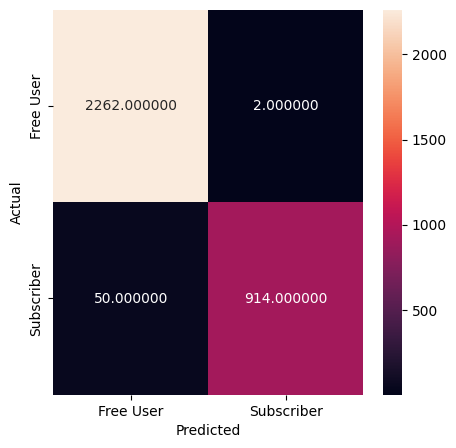

In [ ]:
y_train_pred_tree=tree.predict(x_train)
metrics_score(y_train, y_train_pred_tree)

The model seems to be overfitting (95% of suscribers were rightfully identified)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       971
           1       0.64      0.64      0.64       413

    accuracy                           0.78      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.78      0.78      0.78      1384



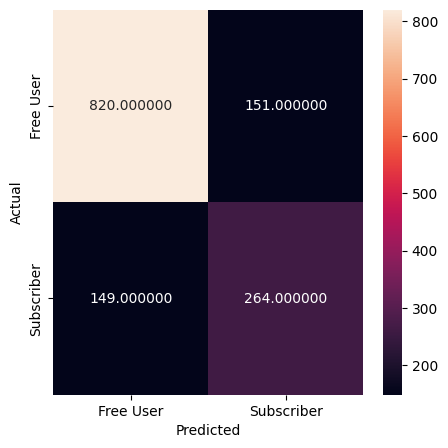

In [ ]:
y_test_pred_tree=tree.predict(x_test)
metrics_score(y_test, y_test_pred_tree)

In [ ]:
dtree_test = model_performance_classification(tree, x_test, y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.741,0.742,0.783


Overall performance goes down drastically on the test data, confirming our assumption of overfitting.
On test data: Recall on **status=1 decreases to 64%**. Recall on status=0 remains ok at 84%, which positively impacts the macro and weighted avg measures.

Precision and Accuracy perform better, but still poorly (.741 and .783). Let's tune.

In [ ]:
pd.DataFrame(dtree_test)

,Precision,Recall,Accuracy
0,0.741,0.742,0.783


*Feature importance*

Text(0.5, 1.0, 'Feature Importance')

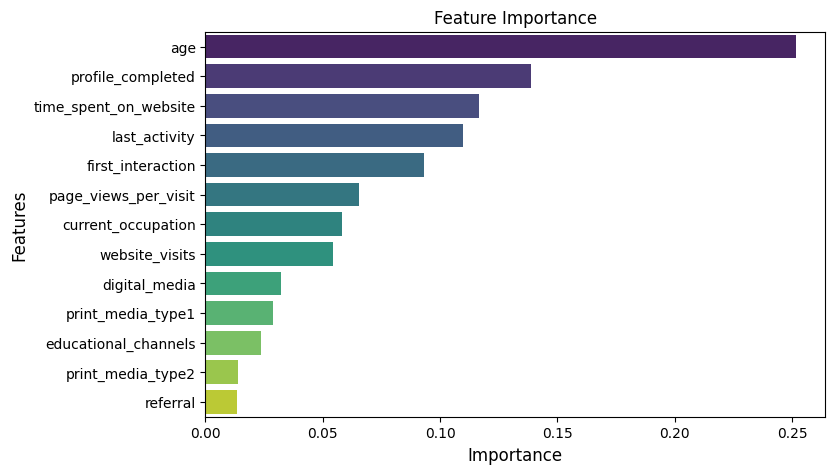

In [ ]:
importance = tree.feature_importances_
columns=x.columns
importance_tree=pd.DataFrame(importance, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8,5))
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree.Importance, y=importance_tree.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance")

**Observation**: These results are quite interesting. Before proceding to the data re-working (and outliers treatment), the top features identified by the model were: age, profile completion, and time spent on the website as the first 3 key features, followed closely by the last activity.
This is alined to the findings of the EDA.

We will now proceed ith tuning the model, before building a random forest and checking of this classification is confirmed.

##*Decision Tree Classifier - Tuning*


In [ ]:
from sklearn.model_selection import GridSearchCV

*Note for the Evaluator: I first started with max_depth 2,7 - selected result was 2; and with min_sample_leaf 5,10, 20, 25 with selected min_samples_leaf at 5. Due to insufficient results after tuning and boosting. I decided to play on these parameters slightly as my research suggested increased max depth and decreased min samples leaf in case of underfitting.*

In [ ]:
dtree_estimator= DecisionTreeClassifier(class_weight={0:0.7014, 1:0.2986}, random_state=1)

parameters={"max_depth":np.arange(3,10), "criterion":["gini", "entropy"], "min_samples_leaf":[3, 4, 5,10,20]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

gridCV=GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=10)

gridCV = gridCV.fit(x_train, y_train)

dtree_estimator=gridCV.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7014, 1: 0.2986}, criterion='entropy',
                       max_depth=3, min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2264
           1       0.73      0.58      0.64       964

    accuracy                           0.81      3228
   macro avg       0.78      0.74      0.76      3228
weighted avg       0.80      0.81      0.80      3228



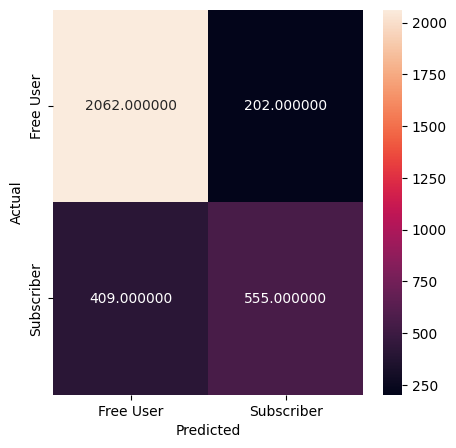

In [ ]:
y_train_pred_tree=dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_tree)

**Observation**: the performance keeps on decreasing with a **Recall for status = 1 reaching 58%**. Predictions of status = 0 improves to 91%.
This performance impacts the macro and weighted avg reaching 74 and 81% on the recall measure.

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       971
           1       0.72      0.58      0.64       413

    accuracy                           0.81      1384
   macro avg       0.78      0.74      0.75      1384
weighted avg       0.80      0.81      0.80      1384



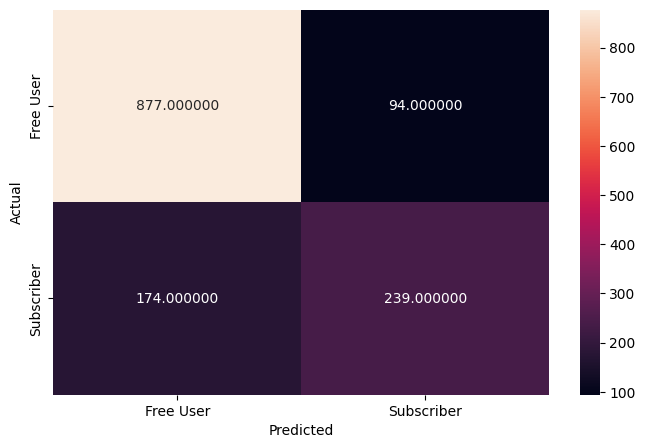

In [ ]:
y_test_pred_tree = dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_tree)

In [ ]:
dtree_tuned_test=model_performance_classification(dtree_estimator, x_test, y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.776,0.741,0.806


**Observations**
- tuned model not performing better than the initial model (Recall performance decreased slightly from 0.742 to 0.741)
- The model is not overfitting (train and test model results are quite close, with minor changes of 0.01)
- **Precision score has increased** from 0.741 to 0.72, but **accuracy has increased** from 0.783 to 0.806 . **F1Score remains unchanged. The scores are still quite low.

Text(0.5, 1.0, 'Feature Importance - Tuned Model')

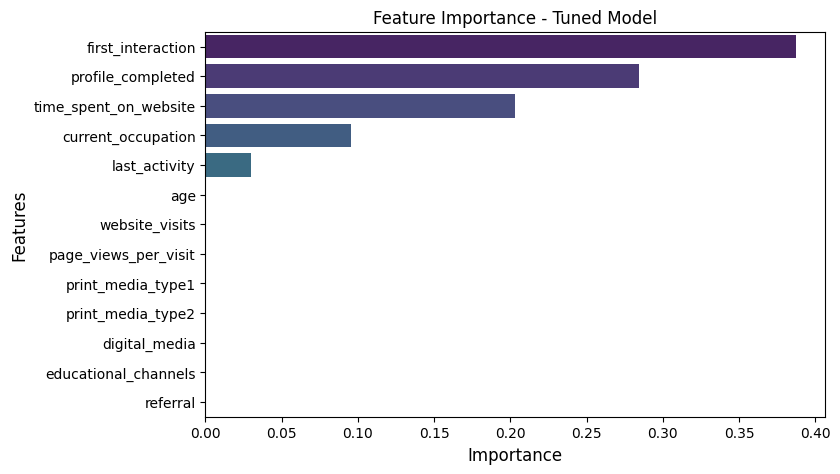

In [ ]:
importance=dtree_estimator.feature_importances_
columns= x.columns
importance_tree=pd.DataFrame(importance, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8,5))
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree.Importance, y=importance_tree.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Tuned Model")

**Observations**
- bias: model oversimplified situation with only 5 features taken into account, and not capturing the other vairbales
- we note a change in some the top features previously identified in the non-tuned model :
from: 1) age, 2) profile completion, 3) time spent, 4) last activity, 5) first interaction --> we go (with the tuned model) to 1) first interaction, 2) profile completion, 3) time spent, 4) current occupation, 5) last activity.

We will now plot the tree

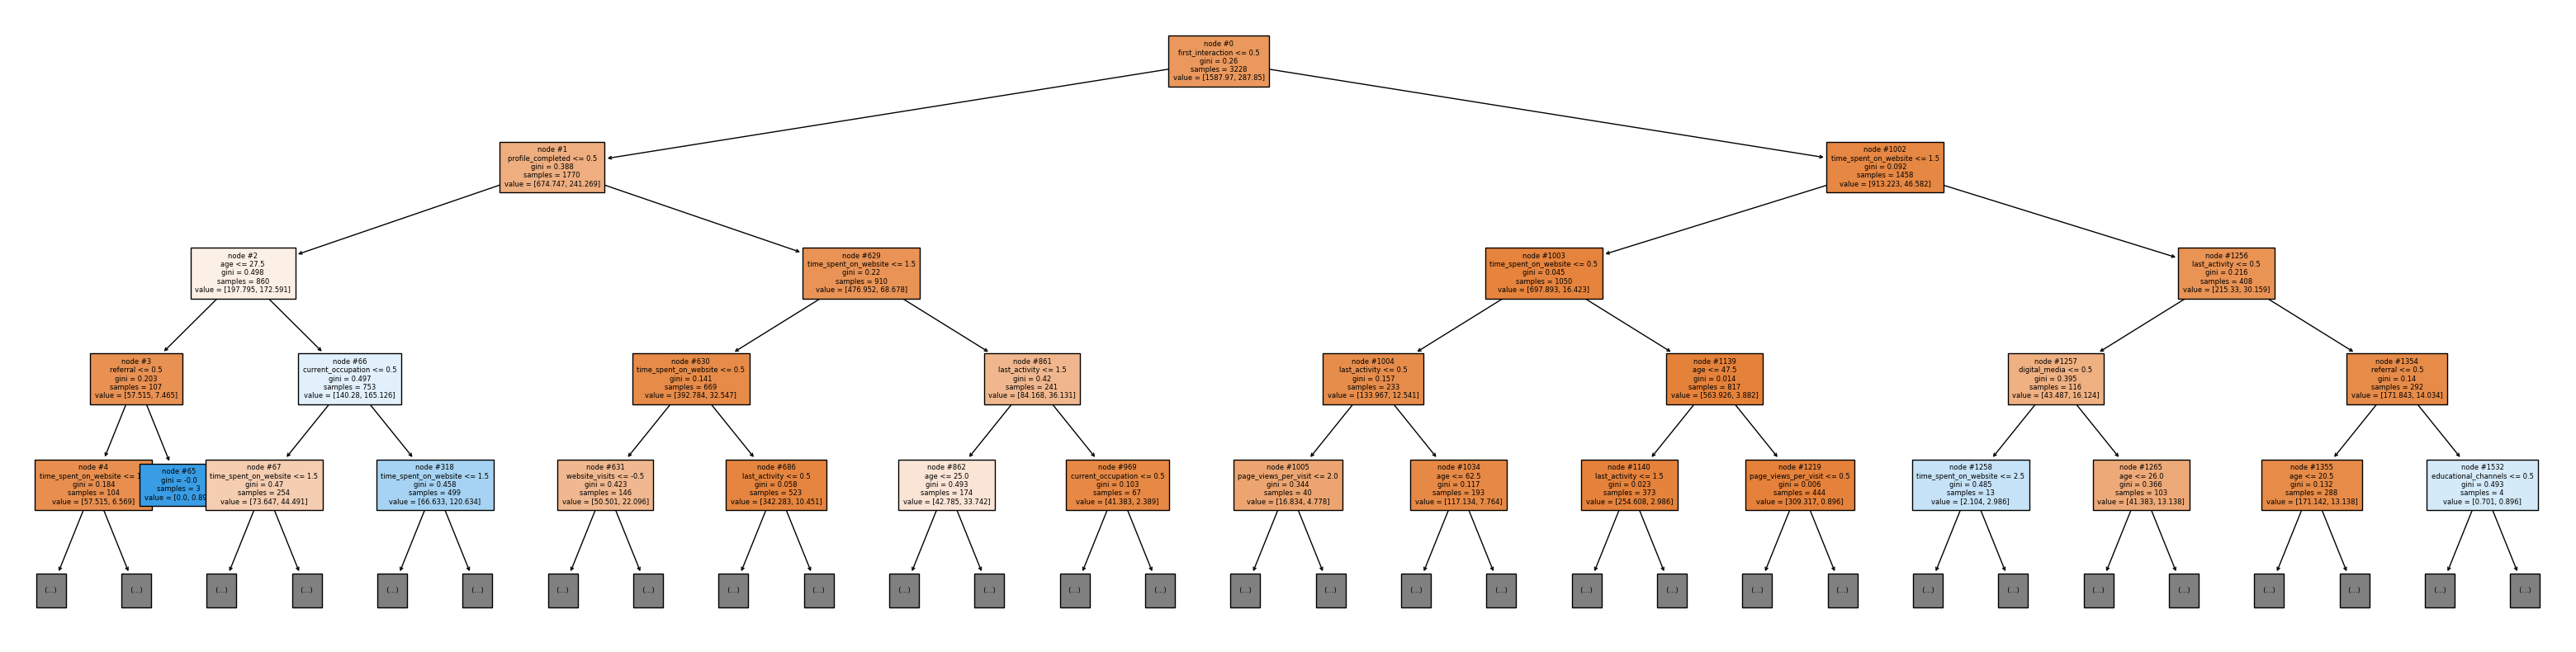

In [ ]:
from sklearn.tree import plot_tree

features=list(x.columns)
plt.figure(figsize=(40,10))
plot_tree(tree, max_depth=4, feature_names=features, filled=True, fontsize=6, node_ids=True, class_names=None) # please zoom in: I could not avoid the overlapping of nodes and keep a readable format
plt.show()

**Observations**
- the decision trees reflect that the following paths are the most likely to lead to subscription:
  - user with a first interaction on the website interface -> not fully completed profile -> age over 27.5 years -> with a referal : dark blue node
  - slightly less strong path (lighter blue):user with a first interaction on the website interface -> not fully completed profile -> age under 27.5 years -> professional --> dark blue node
  - even weaker path (very light blue) : 1) user with a first interaction on the website interface -> time spent over 1.5 time unit -> last activity via website -> refered user -> light blue node
  2) user with a first interaction on the website interface -> time spent over 1.5 time unit -> last activity via email -> does not see digital Media -> light blue node

##*Random Forest Classifier*

In [ ]:
rf_estimator=RandomForestClassifier(class_weight={0:0.7014, 1:0.2986}, random_state=1)
rf_estimator.fit(x_train, y_train)


RandomForestClassifier(class_weight={0: 0.7014, 1: 0.2986}, random_state=1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2264
           1       0.99      0.96      0.98       964

    accuracy                           0.99      3228
   macro avg       0.99      0.98      0.98      3228
weighted avg       0.99      0.99      0.99      3228



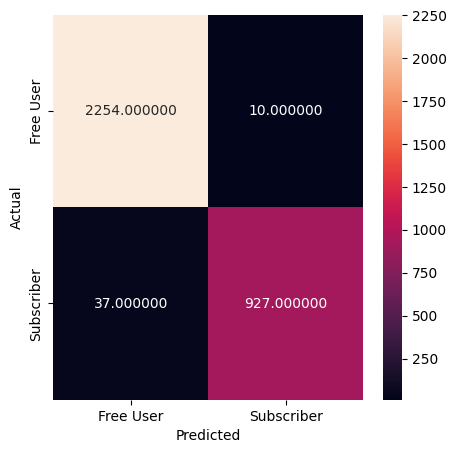

In [ ]:
y_pred_train_rf=rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)


**Observation** *96*% recall for class 1

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       971
           1       0.74      0.66      0.70       413

    accuracy                           0.83      1384
   macro avg       0.80      0.78      0.79      1384
weighted avg       0.83      0.83      0.83      1384



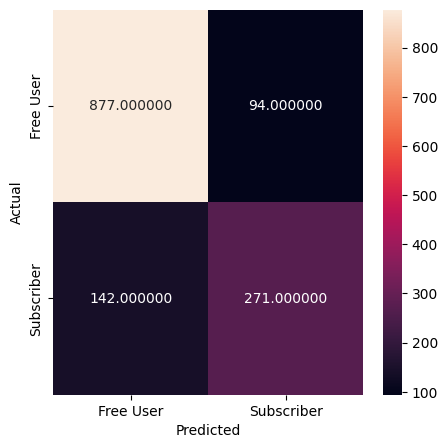

In [ ]:
y_pred_test_rf=rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test=model_performance_classification(rf_estimator, x_test, y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.802,0.780,0.829


**Observation** **Recall falls to 66% for class 1, 0.78 overall**, which is higher than the initial Decision Tree model and tuned Decision Tree model, however it is still extremelly low.
Precision performs a bit better, and F1 score as well, nonetheless both measures are considered as under-performing and need serious tuning.

Looking at the avg and weighted avg measures however, the model is performing better due to a better performance in class 0 which is structurally over-represented in the dataset.

The model is **strongly overfitting** as reflected by the sharp difference between the train and test data.

Text(0.5, 1.0, 'Feature Importance - Random Forest')

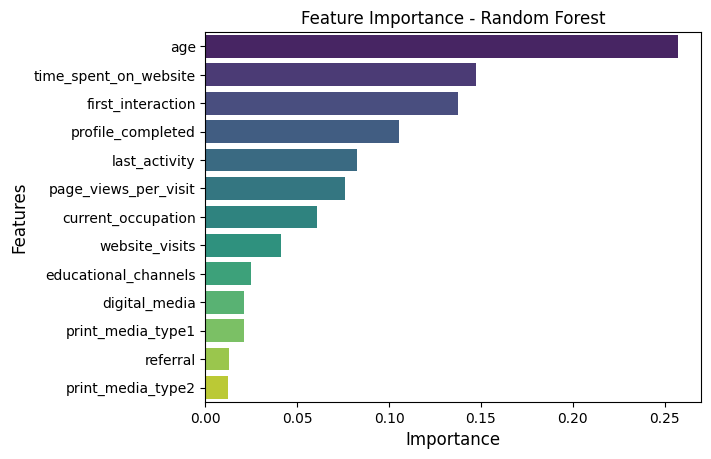

In [ ]:
importances=rf_estimator.feature_importances_
columns=x.columns
importance_tree=pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree.Importance, y=importance_tree.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest")

**Observation** : we notice that the top features seem to remain, although some changes are noted with
- 1) age - 2) time spent - 3) first interaction - 3) profile completion - 4)last activity - 5) page views per visit

We will tune the model to improve its performance and observe if this impacts the feature importance ranking

##*Random Forest Classifier - Tuning*

In [ ]:
rf_estimator_tuned=RandomForestClassifier({0:0.7014, 1:0.2986}, random_state=1)

params_rf={"n_estimators":[100,250,500], "min_samples_leaf":np.arange(1,4,1), "max_features":[0.7, 0.9, "auto"]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x_train, y_train)

rf_estimator_tuned=grid_obj.best_estimator_


In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=3, n_estimators=250,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2264
           1       0.87      0.81      0.84       964

    accuracy                           0.91      3228
   macro avg       0.89      0.88      0.89      3228
weighted avg       0.90      0.91      0.90      3228



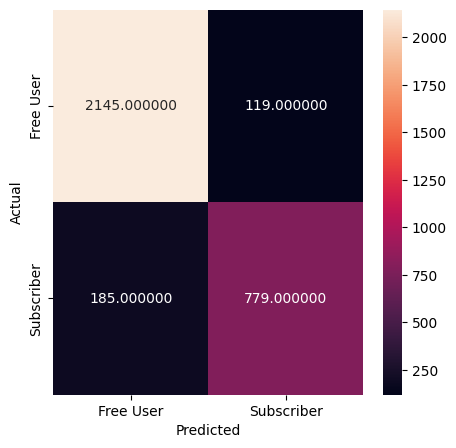

In [ ]:
y_pred_train_rf_tuned=rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       971
           1       0.77      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



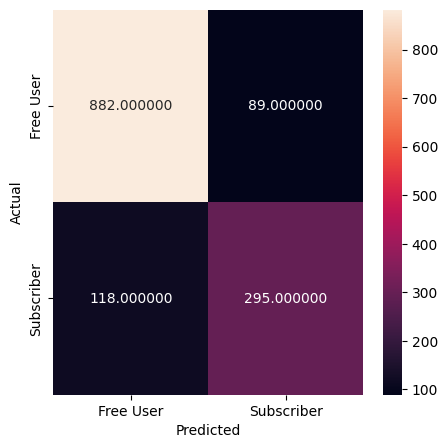

In [ ]:
y_pred_test_rf_tuned=rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test=model_performance_classification(rf_estimator_tuned,x_test,y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.825,0.811,0.850


**Observation** we note an increate in the recall to 0.811, along with improvements in the Precision to 0.825, and Accuracy to 0.850.

Nonetheless the performance seems insufficiant.

Text(0.5, 1.0, 'Feature Importance - Random Forest Tuned')

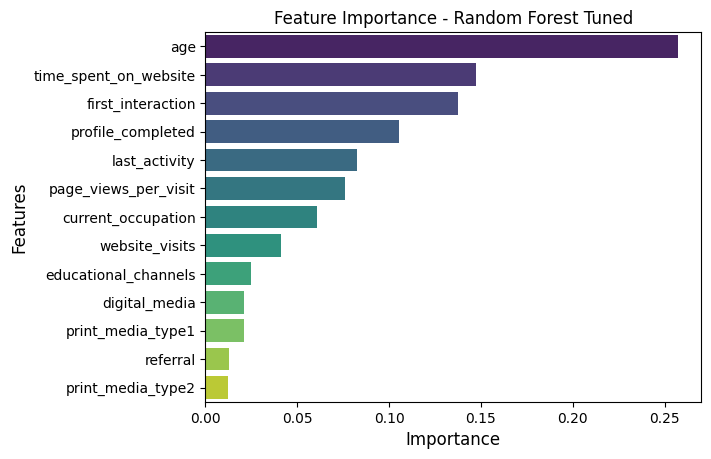

In [ ]:
importances=rf_estimator.feature_importances_
columns=x.columns
importance_tree=pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree.Importance, y=importance_tree.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest Tuned")

##*Feature Selection*: Print Media and Digital Media
(Attempt at improving performance)

In [ ]:
#De-selecting Features identified as amongst the least relevant by the Random Forest Model. We keep referral due to the conclusions of the EDA.
dt_feat_eng = dt.drop(["print_media_type1", "print_media_type2", "digital_media"], axis=1)

In [ ]:
x2=dt_feat_eng.drop(["status"], axis=1)
y2=dt_feat_eng["status"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.3, random_state=1, stratify=y)
print("Shape of the training data: ", x_train2.shape)
print("Shape of the test data: ", x_test2.shape)

Shape of the training data:  (3228, 10)
Shape of the test data:  (1384, 10)


In [ ]:
rf_estimator2=RandomForestClassifier(class_weight={0:0.7014, 1:0.2986}, random_state=1)
rf_estimator2.fit(x_train2, y_train2)

RandomForestClassifier(class_weight={0: 0.7014, 1: 0.2986}, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2264
           1       0.99      0.93      0.96       964

    accuracy                           0.98      3228
   macro avg       0.98      0.96      0.97      3228
weighted avg       0.98      0.98      0.98      3228



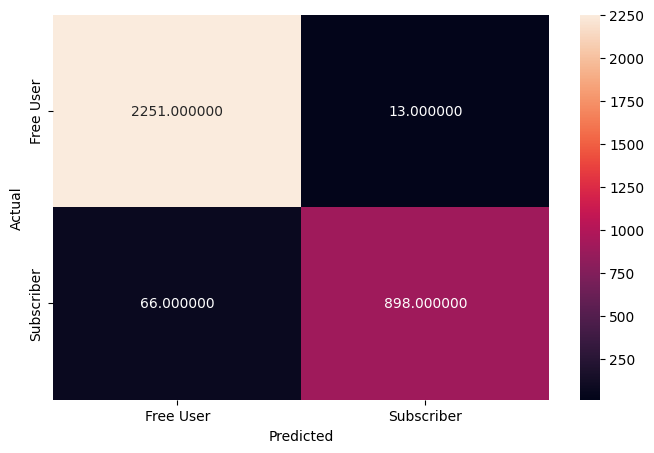

In [ ]:
y_pred_train_rf2=rf_estimator2.predict(x_train2)
metrics_score(y_train2, y_pred_train_rf2)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       971
           1       0.75      0.65      0.70       413

    accuracy                           0.83      1384
   macro avg       0.81      0.78      0.79      1384
weighted avg       0.83      0.83      0.83      1384



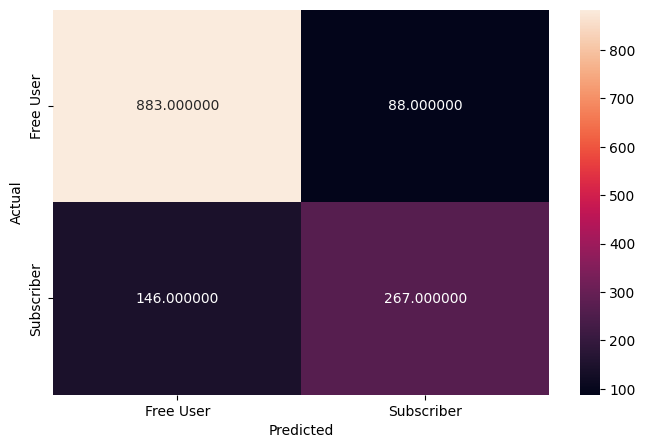

In [ ]:
y_pred_test_rf2=rf_estimator2.predict(x_test2)
metrics_score(y_test2, y_pred_test_rf2)

In [ ]:
#Tuning
rf_estimator_tuned2=RandomForestClassifier({0:0.7014, 1:0.2986}, random_state=1)

params_rf2={"n_estimators":[100,250,500], "min_samples_leaf":np.arange(1,4,1), "max_features":[0.7, 0.9, "auto"]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj2=GridSearchCV(rf_estimator_tuned2, params_rf2, scoring=scorer, cv=5)
grid_obj2=grid_obj2.fit(x_train2, y_train2)

rf_estimator_tuned2=grid_obj2.best_estimator_

In [ ]:
rf_estimator_tuned2.fit(x_train2, y_train2)

RandomForestClassifier(max_features=0.7, min_samples_leaf=3, n_estimators=500,
                       random_state=1)

we take note of a change in the n_estimators from 250 to 500

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2264
           1       0.86      0.80      0.83       964

    accuracy                           0.90      3228
   macro avg       0.89      0.88      0.88      3228
weighted avg       0.90      0.90      0.90      3228



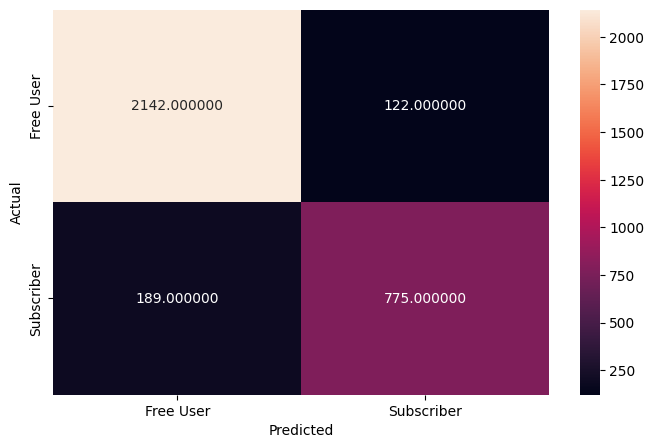

In [ ]:
y_pred_train_rf_tuned2=rf_estimator_tuned2.predict(x_train2)

metrics_score(y_train2, y_pred_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.77      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



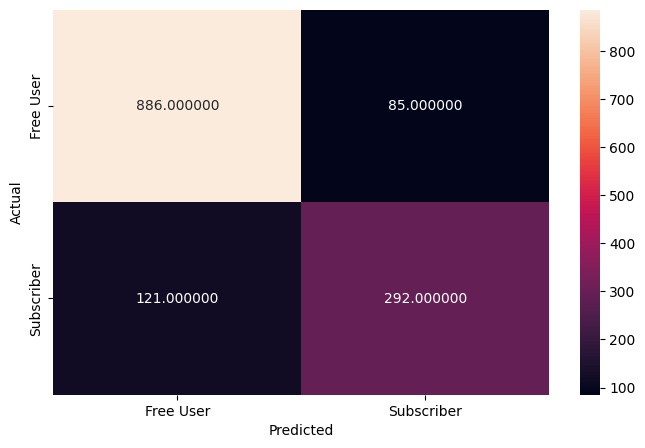

In [ ]:
y_pred_test_rf_tuned2=rf_estimator_tuned2.predict(x_test2)

metrics_score(y_test2, y_pred_test_rf_tuned2)

In [ ]:
rf_estimator_tuned_test2=model_performance_classification(rf_estimator_tuned2,x_test2,y_test2)
rf_estimator_tuned_test2

,Precision,Recall,Accuracy
0,0.827,0.810,0.851


**Observation**
- slight increate in Precision from 0.825. to 0.827, in accuracy from 0.850 to 0.851), but a slight decrease in Recall from 0.811 to 0.810.
The changes are marginal.

Text(0.5, 1.0, 'Feature Importance - Random Forest Tuned V2')

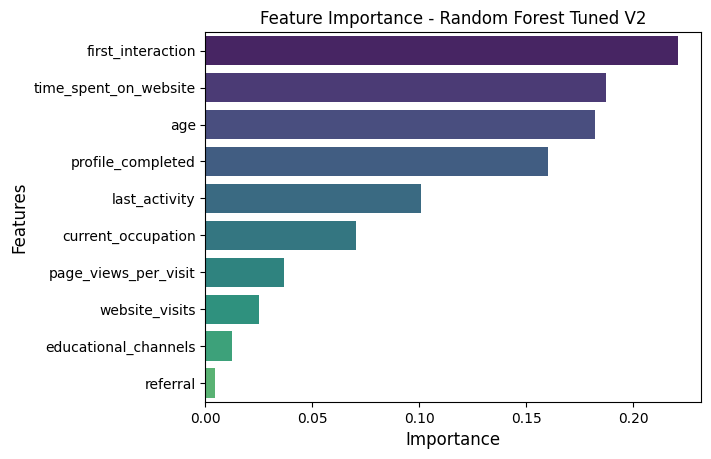

In [ ]:
# Let#s check feature importance in case of change
importances2=rf_estimator_tuned2.feature_importances_
columns2=x2.columns
importance_tree2=pd.DataFrame(importances2, index=columns2, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree2.Importance, y=importance_tree2.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest Tuned V2")

##*Model Boosting*

####**#1 - AdaBoost Classifier**

In [ ]:
adaboost_model = AdaBoostClassifier(random_state=1)

adaboost_model.fit(x_train, y_train)

adaboost_model_perf_test=model_performance_classification(adaboost_model,x_test,y_test)

adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.822,0.794,0.844


**Observation**: the AdaBoost does not perform well as the Recall decreases from 0.81 to 0.794, along with the Precision (from 0.825 to 0.822) and  Accuracy (from 0.850 to 0.844).

####**#2 - XGBoost Classifier**

In [ ]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")

xgb.fit(x_train, y_train)
xgb_perf_test=model_performance_classification(xgb,x_test, y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.814,0.802,0.842


The XGBoost Classifier is performing better than the Ada Boost, but still more poorly than the random forest tuned model: Recall decreased from .81 to .802, Precision from .825 to 8.14, and Accuracy from .850 to 8.42

**Next steps:** in an attempt to improve the performance of the model, we will expand the Random Forest Tuning to tune more hyperparameters using GridSearch CV with a new RF model.
We will then run through the boosting of the new model.

##*Random Forest Tuning #2*

What is implemented:
- n_estimators: slight change in the bracket (both to the lower end and slightly to the upper end, as I have limited computational power and cannot risk building a too heavy model)
- max_depth: More complexity to limit the underfitting, but while trying not to slow down the model too much
- min_samples_leaf: for more flexibility.


In [ ]:
### my computer is laging and does not load due to connection issues this morning
#The notes below show the results that I reached while building the model (see Observations below)
rf_estimator_tuned3=RandomForestClassifier({0:0.7014, 1:0.2986}, random_state=1)

params_rf2={"n_estimators":[250, 300, 350], "max_depth":[4, 6, 10],'min_samples_split': [2, 5, 10],"min_samples_leaf":np.arange(1,4,1), 'max_features': ['auto', 'sqrt', 'log2']
}

scorer2=metrics.make_scorer(recall_score, pos_label=1)

grid_obj2=GridSearchCV(rf_estimator_tuned3, params_rf2, scoring=scorer2, cv=5)
grid_obj2=grid_obj2.fit(x_train, y_train)

rf_estimator_tuned2=grid_obj2.best_estimator_

KeyboardInterrupt: 

In [ ]:
rf_estimator_tuned2.fit(x_train, y_train)

In [ ]:
y_pred_train_rf_tuned2=rf_estimator_tuned2.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned2)

In [ ]:
y_pred_test_rf_tuned3=rf_estimator_tuned2.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned2)

In [ ]:
rf_estimator_tuned_test2=model_performance_classification(rf_estimator_tuned2,x_test,y_test)
rf_estimator_tuned_test2

**Observation**: we're noting a minor improvement on Recall from .811 to .817, Precision slightly impacted from .825 to .824, and Accuracy with a minor increase from .850 to .851.

The hyperparameter tuning was insufficient to drastically improve the model. In the following version of the tuning we will implement more drastic changes on "heavier" parameters (in terms of their impact on the computational power).

##*Random Forest Tuning #3*

In [ ]:
###my computer would not load the model anymore (bad connection this morning -
#however the resutls shown below are from yesterday night.)

rf_estimator_tuned3=RandomForestClassifier({0:0.7014, 1:0.2986}, random_state=1)

params_rf3={"n_estimators":[250, 300, 350], "max_depth":[10, 15, None],'min_samples_split': [2, 5, 10],"min_samples_leaf":np.arange(1,4,1), 'max_features': ['auto', 'sqrt', 'log2']
}

scorer3=metrics.make_scorer(recall_score, pos_label=1)

grid_obj3=GridSearchCV(rf_estimator_tuned3, params_rf3, scoring=scorer3, cv=5)
grid_obj3=grid_obj3.fit(x_train, y_train)

rf_estimator_tuned3=grid_obj3.best_estimator_

In [ ]:
rf_estimator_tuned3.fit(x_train, y_train)

In [ ]:
y_pred_train_rf_tuned3=rf_estimator_tuned3.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned3)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.79      0.72      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



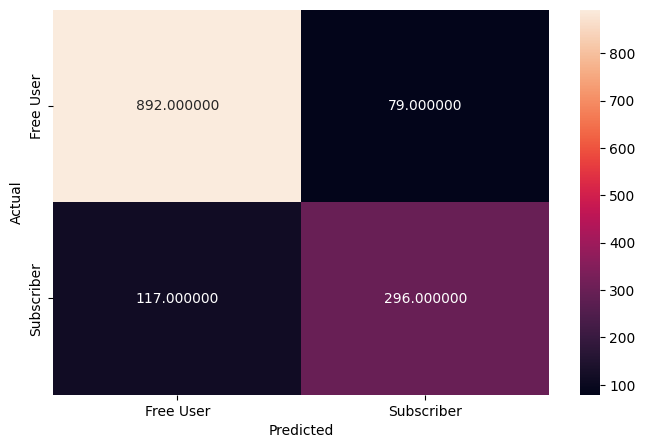

In [ ]:
y_pred_test_rf_tuned3=rf_estimator_tuned3.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned3)

In [ ]:
rf_estimator_tuned_test3=model_performance_classification(rf_estimator_tuned3,x_test,y_test)
rf_estimator_tuned_test3

,Precision,Recall,Accuracy
0,0.837,0.818,0.858


**Observation**: we note a minor improvement of the Recall from .817 to 8.18, but more noticeable improvements of the Precision from .824 to .837 and Accuracy from .851 to .858. However from 2min, the computing time took 12 minutes. Shall we consire the Recall as our key indicator, we would suggest that this new model is not worth the computational power as it only allowed fro a .001 improvement

##*Random Forest Tuning #4*

Notes: I will integrate here the parameters previously selected in the #3 (min_samples leaf 2, min_samples_split 5, n_estimators 250), and will try to explore further on others.

In [ ]:
rf_estimator_tuned4=RandomForestClassifier({0:0.7014, 1:0.2986}, random_state=1)

params_rf4={"n_estimators":[250, 300], "max_depth":[10, 15, None],'min_samples_split': [5,7,10],"min_samples_leaf":np.arange(1,3,1), 'max_features': ['auto', 'sqrt', 'log2']
}

scorer4=metrics.make_scorer(recall_score, pos_label=1)

grid_obj4=GridSearchCV(rf_estimator_tuned4, params_rf4, scoring=scorer4, cv=5)
grid_obj4=grid_obj4.fit(x_train, y_train)

rf_estimator_tuned4=grid_obj4.best_estimator_

In [ ]:
rf_estimator_tuned4.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250, random_state=1)

Observation: Same results provided - we will shift our approach and go back to the feature selection to see if this has an impact

In [ ]:
dt_feat_eng = dt.drop(["print_media_type1", "print_media_type2", "digital_media"], axis=1)

In [ ]:
x2=dt_feat_eng.drop(["status"], axis=1)
y2=dt_feat_eng["status"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.3, random_state=1, stratify=y)
print("Shape of the training data: ", x_train2.shape)
print("Shape of the test data: ", x_test2.shape)

Shape of the training data:  (3228, 10)
Shape of the test data:  (1384, 10)


In [ ]:
rf_estimator_tuned4.fit(x_train2, y_train2)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2264
           1       0.88      0.79      0.83       964

    accuracy                           0.91      3228
   macro avg       0.90      0.87      0.88      3228
weighted avg       0.91      0.91      0.90      3228



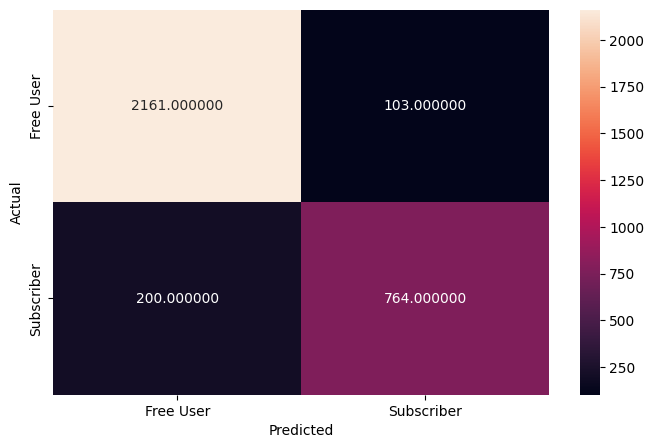

In [ ]:
y_pred_train_rf_tuned4=rf_estimator_tuned4.predict(x_train2)
metrics_score(y_train, y_pred_train_rf_tuned4)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.79      0.69      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



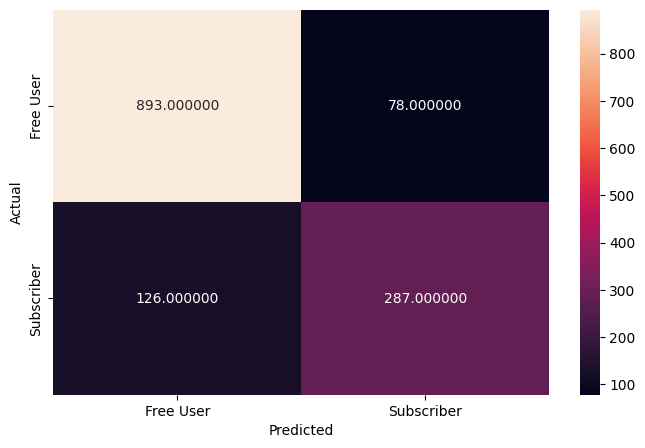

In [ ]:
y_pred_test_rf_tuned4=rf_estimator_tuned4.predict(x_test2)
metrics_score(y_test, y_pred_test_rf_tuned4)

In [ ]:
rf_estimator_tuned_test4=model_performance_classification(rf_estimator_tuned4,x_test2,y_test2)
rf_estimator_tuned_test4

,Precision,Recall,Accuracy
0,0.831,0.807,0.853


We note that our performance (Recall) is decreasing with the feature selection. We will go back to using the full dataset, and tune the Booster.

##*XGBoosting Classifier Tuning #2, #3, #4, #5*

Based on the performance of the XGBoosting Classifier (in compares to ADA Boost), I will directly work on the XGBoost Classifier.
Keeping in mind our limited computational power, we will iteratively tune the booster by playing with the hyperparameters, **starting with n_estimators and max_depth**
The model presented below is the result of several iterations that I overwrote for the sake of space and readabillity, but here are the options I tried:
- n_estimators 100, 200, 300, max_depth 5, 7 10 (result: 100, 5)
-  n_estimators 50, 100, 200, max_depth 4, 5, 7 (result: 100, 4);
and then did the following:

###*n_estimators & max_depth*

In [ ]:
param_grid2 = {"n_estimators":[50,100, 200], "max_depth":[3, 4, 7]}

xgb2 = XGBClassifier(random_state=1, eval_metric="logloss")

scorer_xgb2=metrics.make_scorer(recall_score, pos_label=1)

grid_xgb2=GridSearchCV(xgb2, param_grid2, scoring=scorer_xgb2, cv=5)
grid_xgb2=grid_xgb2.fit(x_train, y_train)

xgb2=grid_xgb2.best_estimator_

In [ ]:
xgb2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_perf_2=model_performance_classification(xgb2,x_test, y_test)
xgb_perf_2

,Precision,Recall,Accuracy
0,0.838,0.823,0.861


We fear that decreased the max_depth below 3 would give a forest that is too shallow. We will now focus on the **learning rate**:

###*learning_rate*

In [ ]:
param_grid3 = {"n_estimators":[50,100, 200], "max_depth":[3, 4, 7], "learning_rate":[0.01, 0.05]}

xgb3 = XGBClassifier(random_state=1, eval_metric="logloss")

scorer_xgb3=metrics.make_scorer(recall_score, pos_label=1)

grid_xgb3=GridSearchCV(xgb3, param_grid3, scoring=scorer_xgb3, cv=5)
grid_xgb3=grid_xgb3.fit(x_train, y_train)

xgb3=grid_xgb3.best_estimator_

In [ ]:
xgb3.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_perf_3=model_performance_classification(xgb3,x_test, y_test)
xgb_perf_3

,Precision,Recall,Accuracy
0,0.830,0.814,0.854


In [ ]:
param_grid4 = {"n_estimators":[100, 200, 250], "max_depth":[5, 7, 10], "learning_rate":[0.03, 0.05]}

xgb4 = XGBClassifier(random_state=1, eval_metric="logloss")

scorer_xgb4=metrics.make_scorer(recall_score, pos_label=1)

grid_xgb4=GridSearchCV(xgb4, param_grid4, scoring=scorer_xgb4, cv=5)
grid_xgb4=grid_xgb4.fit(x_train, y_train)

xgb4=grid_xgb4.best_estimator_

In [ ]:
xgb4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_perf_4=model_performance_classification(xgb4,x_test, y_test)
xgb_perf_4

,Precision,Recall,Accuracy
0,0.829,0.811,0.853


The results are lower than before, we will therefor cut out the learning rate parameter tuning, and focus on the **sub sample**, **colsample_bytree**, and **gamma**.

###*sub_sample, colsample_bytree & gamma*

In [ ]:
param_grid5 = {"n_estimators":[50,100, 200], "max_depth":[3, 4, 7], "subsample": [0.8, 1.0], "colsample_bytree":[0.8, 1.0], "gamma":[0, 0.01, 0.1]}

xgb5 = XGBClassifier(random_state=1, eval_metric="logloss")

scorer_xgb5=metrics.make_scorer(recall_score, pos_label=1)

grid_xgb5=GridSearchCV(xgb5, param_grid5, scoring=scorer_xgb5, cv=5)
grid_xgb5=grid_xgb5.fit(x_train, y_train)


xgb5=grid_xgb5.best_estimator_

In [ ]:
xgb5.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_perf_5=model_performance_classification(xgb5,x_test, y_test)
xgb_perf_5

,Precision,Recall,Accuracy
0,0.838,0.823,0.861


In [ ]:

pd.DataFrame(xgb_perf_5)

,Precision,Recall,Accuracy
0,0.838,0.823,0.861


**Observation** : We can note that the model is choosing the default values for a number of these hyperparameters (colsample, gamma), and that the performance is not improving.
It seems that we have reached the limit of the tools at our disposal to proceed further (feedback welcome from correctors to see what more I could have done to improve the performance better).

##*XGBoosting Classifier Tuning #5 Feature Importance*

Text(0.5, 1.0, 'Feature Importance - XGB Classifier Tuned')

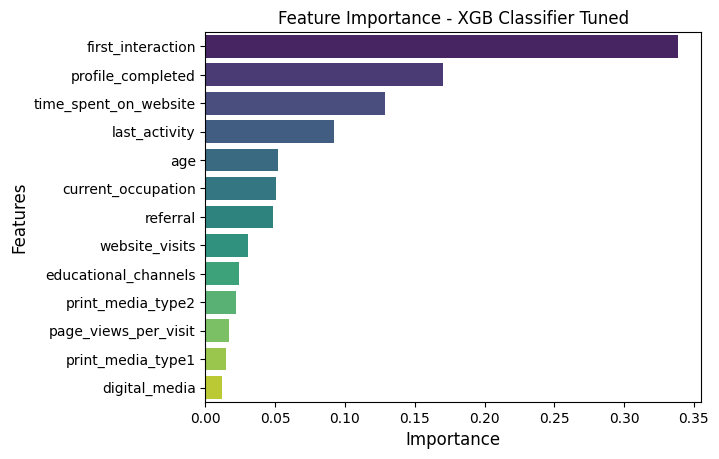

In [ ]:
importances=xgb5.feature_importances_
columns=x.columns
importance_xgb=pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_xgb.Importance, y=importance_xgb.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - XGB Classifier Tuned")

# Results Comparison and Final Observations


**Conclusions**:
Lead profile characteristics (top 5): interestingly, while the EDA seemed to propose a demographic-based profile reflecting the age and occupation as strong features (amongst others), our best-performing model is showing that the user behavior and engagement with the product is a lot more important. The top 5 characteristics of a paying subscribers are the following (by order of importance):
- **First interaction**: Website interface strongly favored

- **profile complemented** : High degree of completion of the profile

- **time spent on website** : High degree of engagement (time spent) on the website -- as a reference, the graph from the EDA strongly showed a highly engagement sub-group starting at 1,000 time units. This is confirmed by the model

- **last activity** : platform used

- **age** / **current occupation**: almost ex-aeco, these two features refer to an older time range and professional group.


Recommendations:
- **Revision of the marketing strategy**. Marketing was cited in the introduction as one of the key ways to convert free users into paying customers. Our analysis seems to indicate otherwise as the print media 1, print media 2 and digital media all strongly underperformed, and did not appear as important nodes in our tree/forest. A thorough **revision of the marketing strategy might be needed, taking into account: the older age range of most customers (over 45) + the active younger subgroup (30-34)**, and their **preference for the website interface and email interactions**

- **Revision of the target population / outreach strategy**: amongst the target group, the company cited students in the introduction. Our analysis demonstrated that the vast majority of paying users are above 45 years old. We however noted an interest of younger age groups, reflected in high numbers of free accounts, however their conversion seems hindered by other factors. The data lacks to understand the difficulty to convert the younger audience into paying clients, but we would suggest: **conducting an age-based cost structure**, **encouraging referrals amongst students / universities**,  **developing targeted marketing strategy**

- **Propose incentives based on engagement**: our analysis identified a number of key features for the conversion of free users to paying clients, including: the **time spent on the website**, **number of pages viewed per visit**. A high degree of interaction / engagement was demonstrated by paying users, thus we suggest that the company implement a thorough user-engagement tracking system to send tailored price-related (or other) incentives to the free users that satisfy these requirement (ie: time spent on website about 1,200 time units)

- **Boosting / Killing App interface** - it appeared that the app interface was not a preferred means of interaction for users. We suggest that the company conducts a thorough analysis of user interactions on the app interface (data lacking from the data set past the first interaction) and decide, based on the age-range strategy, whether to boost it, or kill it (=invest substantial efforts into improving the interface / kill the project to save funds).
